<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


C:\Users\ASUS\anaconda3\envs\ibm_sql\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


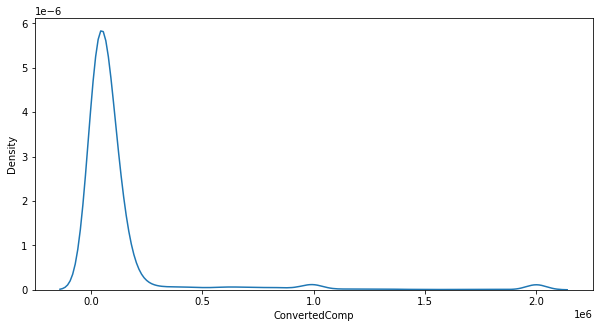

In [39]:
plt.figure(figsize=(10,5))
sns.distplot(a=df["ConvertedComp"],bins=20,hist=False)
plt.show()

Plot the histogram for the column `ConvertedComp`.


(array([9504.,  350.,  108.,  103.,   90.,   81.,  128.,   33.,   13.,
          11.,   16.,  145.]),
 array([      0.        ,  166666.66666667,  333333.33333333,
         500000.        ,  666666.66666667,  833333.33333333,
        1000000.        , 1166666.66666667, 1333333.33333333,
        1500000.        , 1666666.66666667, 1833333.33333333,
        2000000.        ]),
 <BarContainer object of 12 artists>)

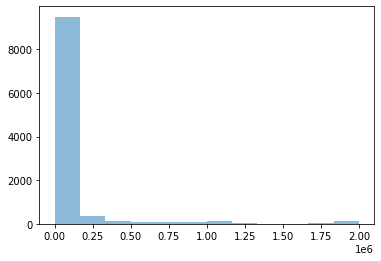

In [93]:
plt.hist(df['ConvertedComp'], bins=12, alpha=0.5)

What is the median of the column `ConvertedComp`?


In [27]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [34]:
# your code goes here
man = df[df['Gender']=='Man']
len(man)

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [33]:
woman = df[df['Gender']=='Woman']
woman['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [46]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


C:\Users\ASUS\anaconda3\envs\ibm_sql\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


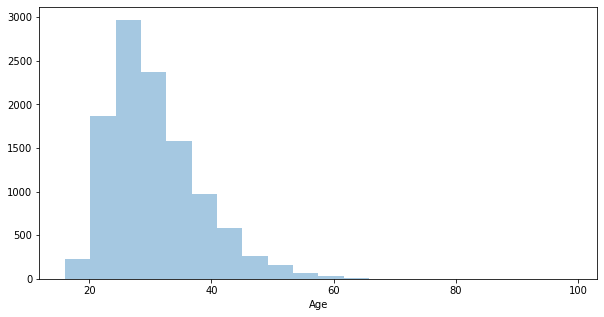

In [48]:
# your code goes here
plt.figure(figsize=(10,5))
sns.distplot(a=df["Age"],bins=20,kde=False)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


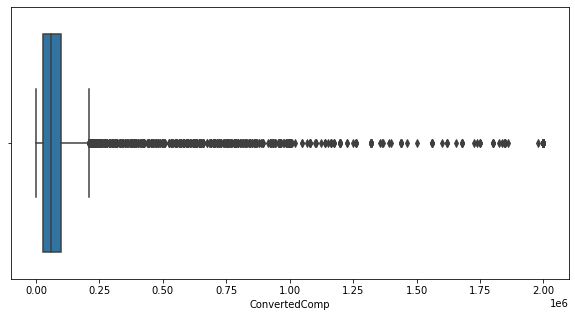

In [49]:
# your code goes here
plt.figure(figsize=(10,5))
sns.boxplot(x=df['ConvertedComp'], data=df)
plt.show()

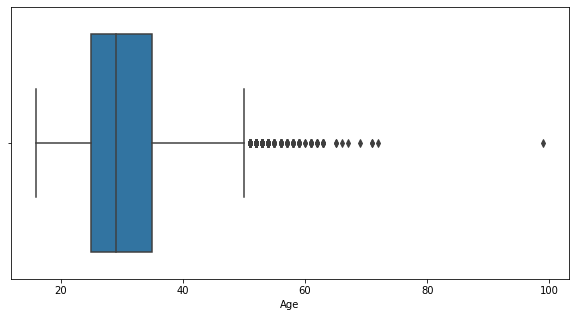

In [61]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Age'], data=df)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [58]:
Q1 = df["ConvertedComp"].quantile(0.25)
Q3 = df["ConvertedComp"].quantile(0.75)
IQR = Q3 - Q1
IQR

73132.0

Find out the upper and lower bounds.


In [65]:
# your code goes here
print("Upper bound: ", df['ConvertedComp'].max())
print("Lower bound: ", df['ConvertedComp'].min())

Upper bound:  2000000.0
Lower bound:  0.0


Identify how many outliers are there in the `ConvertedComp` column.


In [67]:
# your code goes here
lower_outliers = df['ConvertedComp'] < (Q1 - 1.5 * IQR)
upper_outliers = df["ConvertedComp"] > (Q3 + 1.5 * IQR)

In [82]:
outliers = lower_outliers | upper_outliers
outliers.sum()

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [86]:
# your code goes here
df_unoutlier = df[~upper_outliers]

In [85]:
# checking outlier presence
print("lower_outlier: ",(df_unoutlier["ConvertedComp"] > (Q3 + 1.5 * IQR)).sum())
print("upper_outlier: ",(df_unoutlier["ConvertedComp"] < (Q1 - 1.5 * IQR)).sum())

lower_outlier:  0
upper_outlier:  0


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [59]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
